<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/02_Categorical_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Categorical Data Visualization</h1>

## Overview
<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>Data visualization helps in anlysing the features of the data and helps in feature selction. In this section we will </p>
    <ol>
        <li>Import Cleaned Data.</li>
        <li>Split in Categorical and Numerical Features.</li>
        <li>Visualize Categorical Data.</li>
        <li>Visualize Target Data.</li>
    </ol>
</div>

### Standard Imports

In [ ]:
#Run this cell working in colab.
!pip install klib
!pip install matplotlib=3.51

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import klib as kl
import matplotlib.pyplot as plt

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Disable pretty
%pprint

%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set() 

Pretty printing has been turned OFF


In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Import Data

In [4]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv')
data = kl.data_cleaning(data)

Long column names detected (>25 characters). Consider renaming the following columns ['parent_school_satisfaction'].
Shape of cleaned data: (478, 17)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-83.33%)



In [ ]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_cleaned.csv'
data = pd.read_csv(url)
data = kl.data_cleaning(data)

In [ ]:
# Cheack the data is properly loaded
data.head()

In [ ]:
# Data Characteristics
data.info()

### 2. Split in Categorical and Numerical Features

In [5]:
CATEGORICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] == 'category'])[:-1]
CATEGORICAL_FEATURES

['gender', 'nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']

In [6]:
NUMERICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] != 'category'])
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

In [7]:
TARGET = 'class'

### 3. Visualize Categorical Data

Categorical data can have following issues when considered for training ML models:

**Cardinalty:** Variables with too many labels tend to dominate over those with only few labels, particularly in Tree based Algorithms.

**Rare Labels:** Rare labels may be present in trianig set, but not in test set, causing over-fitting to the train set.

**Rare Labels:** Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it for scoring.

In [8]:
for i,feature in enumerate(CATEGORICAL_FEATURES):
    print(f'{i+1}. {feature}: {len(data[feature].unique())} unique labels. \n {data[feature].unique().to_numpy()} \n')

1. gender: 2 unique labels. 
 ['M' 'F'] 

2. nationality: 14 unique labels. 
 ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela'
 'Iran' 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Libya'] 

3. place_of_birth: 14 unique labels. 
 ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela'
 'Iran' 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Libya'] 

4. stage_id: 3 unique labels. 
 ['LowerLevel' 'MiddleSchool' 'HighSchool'] 

5. grade_id: 10 unique labels. 
 ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02'] 

6. section_id: 3 unique labels. 
 ['A' 'B' 'C'] 

7. topic: 12 unique labels. 
 ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology'] 

8. semester: 2 unique labels. 
 ['F' 'S'] 

9. relation: 2 unique labels. 
 ['Father' 'Mum'] 

10. parent_answering_survey: 2 unique labels. 
 ['Yes' 'No'] 

11. parent_school_satisfaction: 2 unique labels. 
 ['Good' 'Bad'] 

12. student_

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p>1. Features with 2 unique lables can be encoded as binary features.</p> 
<p>2. Feature with more than 2 independent lables can be coded as nominal features.
   (No relation exist between lables.)</p>
<p>3. Feature with more than 2 related lables can be coded as ordinal features.
   (There is ordinal relation between lables.)</p> 
</div>

#### 3.1 Binary Categorical Features

In [9]:
# Binary Features
BINARY_FEATURES = list([category for category in CATEGORICAL_FEATURES if (len(data[category].unique())) == 2])
print(BINARY_FEATURES )
print(f'Total number of Binary Categories: {len(BINARY_FEATURES)}')

['gender', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']
Total number of Binary Categories: 6


In [10]:
binary_df = data[BINARY_FEATURES]
binary_df.head()

,gender,semester,relation,parent_answering_survey,parent_school_satisfaction,student_absence_days
0,M,F,Father,Yes,Good,Under-7
1,M,F,Father,Yes,Good,Under-7
2,M,F,Father,No,Bad,Above-7
3,M,F,Father,No,Bad,Above-7
4,M,F,Father,No,Bad,Above-7


In [11]:
gender_df =  pd.DataFrame(binary_df['gender'].value_counts()).reset_index()
gender_df

,index,gender
0,M,303
1,F,175


In [12]:
semester_df = pd.DataFrame(binary_df['semester'].value_counts()).reset_index()
semester_df

,index,semester
0,F,244
1,S,234


In [13]:
relation_df = pd.DataFrame(binary_df['relation'].value_counts()).reset_index()
relation_df

,index,relation
0,Father,281
1,Mum,197


In [14]:
parent_answering_survey_df = pd.DataFrame(binary_df['parent_answering_survey'].value_counts()).reset_index()
parent_answering_survey_df

,index,parent_answering_survey
0,Yes,270
1,No,208


In [15]:
parent_school_satisfaction_df = pd.DataFrame(binary_df['parent_school_satisfaction'].value_counts()).reset_index()
parent_school_satisfaction_df

,index,parent_school_satisfaction
0,Good,292
1,Bad,186


In [16]:
student_absence_days_df = pd.DataFrame(binary_df['student_absence_days'].value_counts()).reset_index()
student_absence_days_df

,index,student_absence_days
0,Under-7,289
1,Above-7,189


#### 3.2 Binary Categorical Feature plots

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> Ploting binary feature counts gives us feature's balance visually.</p>
<p> General rule of thumb upto 60:40 is considered a balnced data for ML model training.</p>
</div>

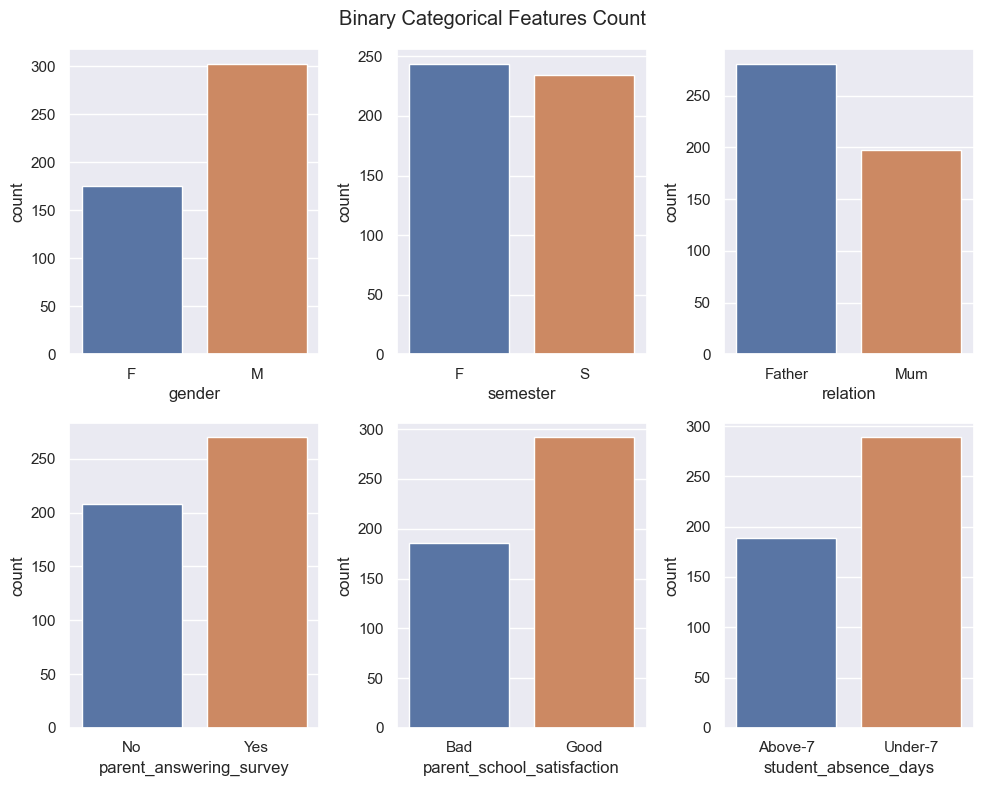

In [17]:
# Visualizing Binary Features Counts
fig, axs = plt.subplots(2,3)
fig.suptitle('Binary Categorical Features Count')

for i,feature in enumerate(BINARY_FEATURES):
    x = 0 if i <= 2 else 1
    y = i if i <= 2 else i-3
    sns.countplot(ax=axs[x,y], x=feature, data=binary_df)   

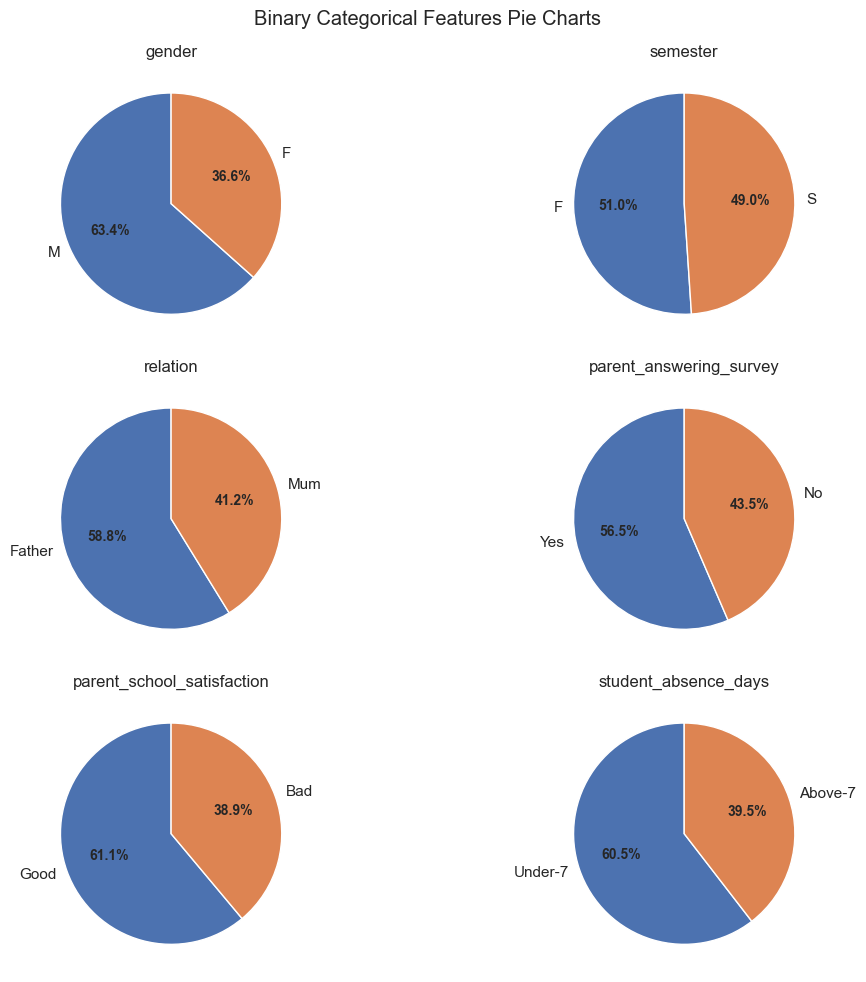

In [18]:
def pie_plot(r,c,name,data_frame):  
    txtLabels = tuple(data_frame['index'].unique())
    fractions = data_frame[data_frame.columns[1]]
    
    _, _, autotexts = ax[r,c].pie(fractions, labels=txtLabels,autopct='%1.1f%%',startangle=90);
    ax[r,c].set_title(name)
    plt.setp(autotexts, size=10, weight="bold")
    
fig, ax = plt.subplots(3,2,figsize=(12, 10), subplot_kw=dict(aspect="equal"))
fig.suptitle('Binary Categorical Features Pie Charts')

pie_plot(0,0,'gender',gender_df)
pie_plot(0,1,'semester',semester_df)
pie_plot(1,0,'relation',relation_df)
pie_plot(1,1,'parent_answering_survey',parent_answering_survey_df)
pie_plot(2,0,'parent_school_satisfaction',parent_school_satisfaction_df)
pie_plot(2,1,'student_absence_days',student_absence_days_df)


<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
The distributions in all the binary categorical features are close to the 60:40 rule.
</div>

#### 3.3 Nominal and Ordinal Categorical Features

In [19]:
# Nominal Features
NOMINAL_FEATURES = list([category for category in CATEGORICAL_FEATURES if (len(data[category].unique())) != 2])
print(NOMINAL_FEATURES)
print(f'Total number of Nominal Categories: {len(NOMINAL_FEATURES)}')

['nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic']
Total number of Nominal Categories: 6


In [20]:
nominal_df = data[NOMINAL_FEATURES]
nominal_df.head()

,nationality,place_of_birth,stage_id,grade_id,section_id,topic
0,Kuwait,Kuwait,LowerLevel,G-04,A,IT
1,Kuwait,Kuwait,LowerLevel,G-04,A,IT
2,Kuwait,Kuwait,LowerLevel,G-04,A,IT
3,Kuwait,Kuwait,LowerLevel,G-04,A,IT
4,Kuwait,Kuwait,LowerLevel,G-04,A,IT


In [21]:
nationality_df = pd.DataFrame(nominal_df['nationality'].value_counts()).reset_index()
nationality_df

,index,nationality
0,Kuwait,179
1,Jordan,170
2,Palestine,28
3,Iraq,22
4,Lebanon,17
5,Tunis,12
6,SaudiArabia,11
7,Egypt,9
8,Syria,7
9,Iran,6


In [22]:
place_of_birth_df = pd.DataFrame(nominal_df['place_of_birth'].value_counts()).reset_index()
place_of_birth_df

,index,place_of_birth
0,Kuwait,180
1,Jordan,174
2,Iraq,22
3,Lebanon,19
4,SaudiArabia,16
5,USA,16
6,Palestine,10
7,Egypt,9
8,Tunis,9
9,Iran,6


In [23]:
stage_id_df = pd.DataFrame(nominal_df['stage_id'].value_counts()).reset_index()
stage_id_df

,index,stage_id
0,MiddleSchool,248
1,LowerLevel,197
2,HighSchool,33


In [24]:
grade_id_df = pd.DataFrame(nominal_df['grade_id'].value_counts()).reset_index()
grade_id_df

,index,grade_id
0,G-02,145
1,G-08,116
2,G-07,101
3,G-04,48
4,G-06,32
5,G-11,13
6,G-12,11
7,G-09,5
8,G-10,4
9,G-05,3


In [25]:
section_id_df = pd.DataFrame(nominal_df['section_id'].value_counts()).reset_index()
section_id_df

,index,section_id
0,A,281
1,B,167
2,C,30


In [26]:
topic_df = pd.DataFrame(nominal_df['topic'].value_counts()).reset_index()
topic_df

,index,topic
0,IT,95
1,French,63
2,Arabic,59
3,Science,51
4,English,45
5,Biology,30
6,Spanish,25
7,Chemistry,24
8,Geology,24
9,Quran,22


#### 3.4 Nominal and Ordinal Categorical Feature plots

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
'stage_id' and 'section_id' have low nominal values but 'nationality', 'placeof_birth','grade_id' and 'topic' have high cardinality and rare lables.
</div>

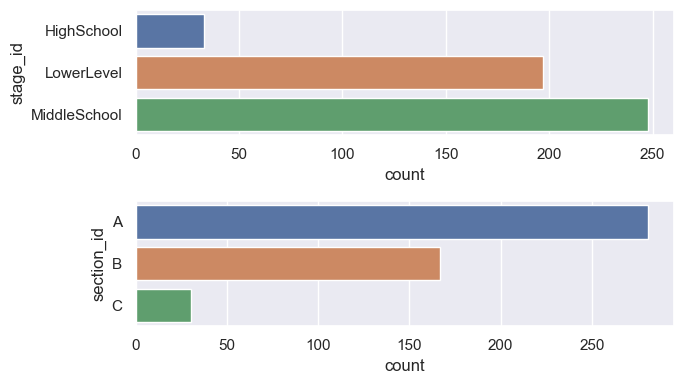

In [27]:
# Visualizing Ordinal Features Counts
plt.rcParams["figure.figsize"] = [7.00, 4.00]
fig, axs = plt.subplots(2)

sns.countplot(ax=axs[0], y='stage_id', data=nominal_df)
sns.countplot(ax=axs[1], y='section_id', data=nominal_df);

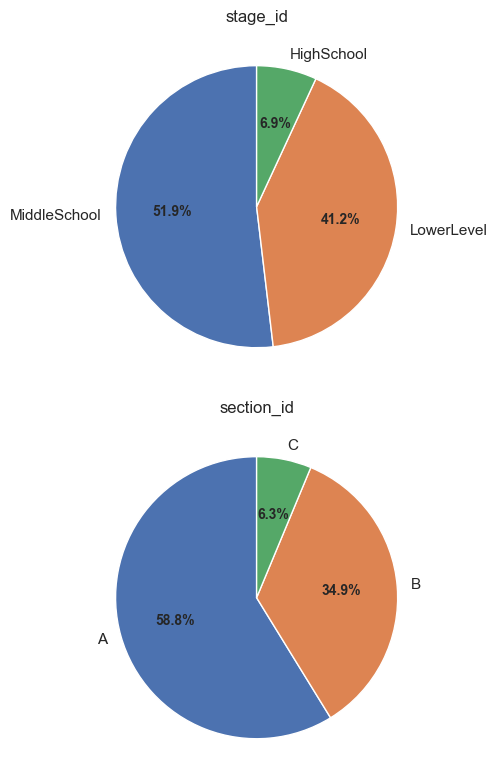

In [28]:
def pie_plot_col(r,c,name,data_frame):  
    txtLabels = tuple(data_frame['index'].unique())
    fractions = data_frame[data_frame.columns[1]]
    _, _, autotexts = ax[c].pie(fractions, labels=txtLabels,autopct='%1.1f%%',startangle=90);
    ax[c].set_title(name)
    plt.setp(autotexts, size=10, weight="bold")
    
fig, ax = plt.subplots(2,figsize=(8, 8), subplot_kw=dict(aspect="equal"))

pie_plot_col(0,0,'stage_id',stage_id_df)
pie_plot_col(0,1,'section_id',section_id_df)

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
 <p>'stage_id' and 'section_id'</p>
 <p> Inspecting the histograms and pie charts reveals that the labels in these two categories are not balance.</p>
</div>

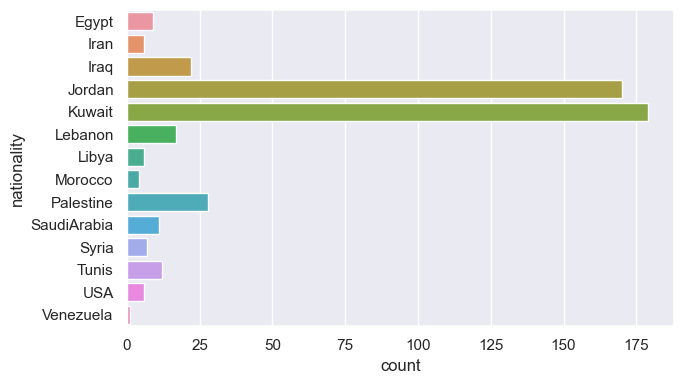

In [29]:
sns.countplot(y='nationality', data=nominal_df);

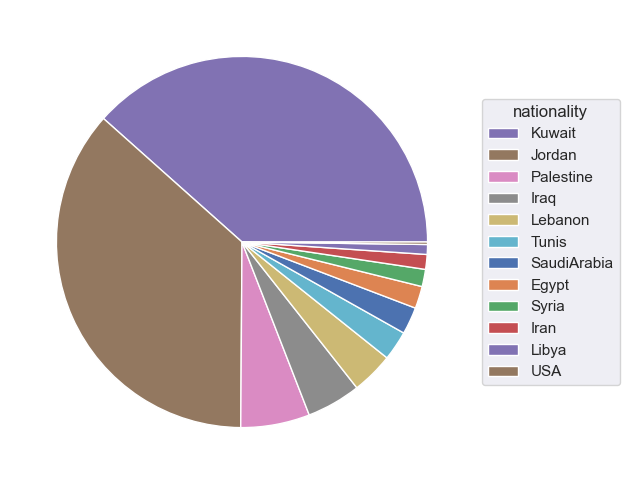

In [30]:
def pie_plot_single(data_frame,title):    
    data = tuple(data_frame[title].unique())
    labels = data_frame[data_frame.columns[0]]
    
    
    fig, ax = plt.subplots(figsize=(12, 5), subplot_kw=dict(aspect="equal"))
    wedges = ax.pie(data_frame[title],startangle=90);
    wedges, texts = ax.pie(data)

    ax.legend(wedges, labels,
              title = title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1)); 

pie_plot_single(nationality_df,'nationality')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> Inspecting the histogram and pie chart of 'nationality' reveals the presence of rare labels.</p>
</div>

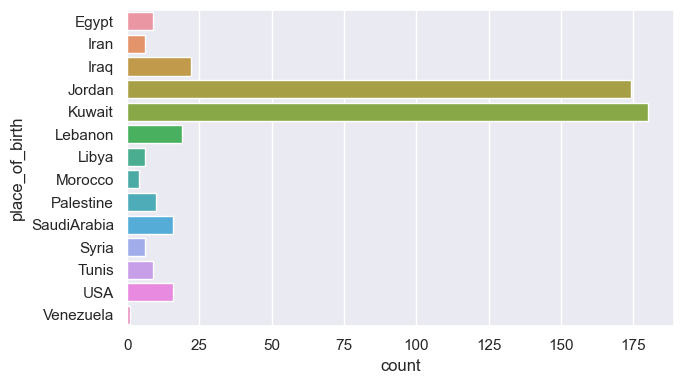

In [31]:
sns.countplot(y='place_of_birth', data=nominal_df);

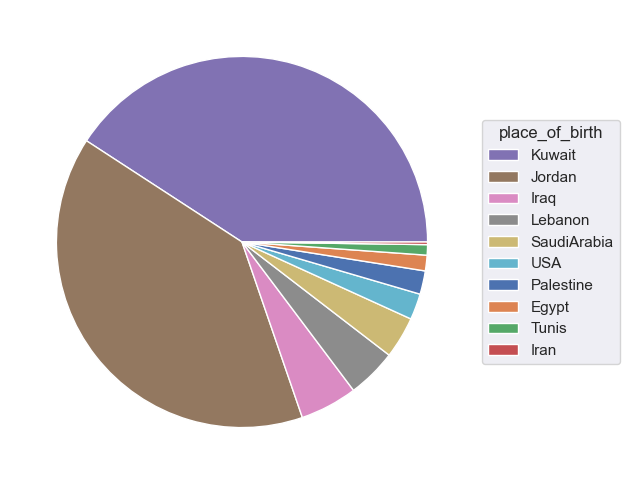

In [32]:
pie_plot_single(place_of_birth_df,'place_of_birth')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> Inspecting the histogram and pie chart of 'place_of_birth' reveals the presence of rare labels.</p>
<p> Visually comparing the 'nationality' and 'place_of_birth' features exibit close similarities.</p>
</div>

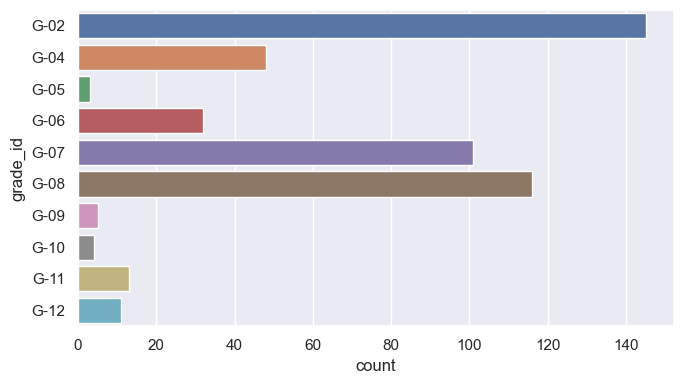

In [33]:
sns.countplot(y='grade_id', data=nominal_df);

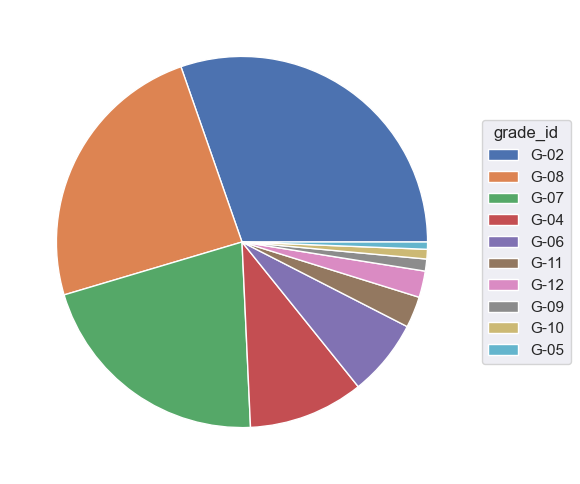

In [34]:
pie_plot_single(grade_id_df,'grade_id')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> Inspecting the histogram and pie chart of 'grade_id' reveals the presence of rare labels.</p>
</div>

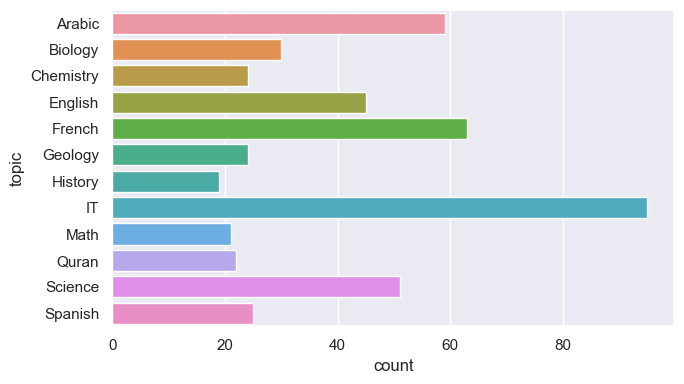

In [35]:
sns.countplot(y='topic', data=nominal_df);

In [ ]:
pie_plot_single(topic_df,'topic')

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> Inspecting the histogram and pie chart of 'topic' exibit variations in labels.</p>
</div>

### 4. Visualize Target Data

In [ ]:
target_df = pd.DataFrame(data[TARGET].value_counts()).reset_index()
target_df

In [ ]:
plt.figure(figsize=(8, 2))
sns.countplot(y=TARGET, data=data);

In [ ]:
txtLabels = tuple(target_df['index'].unique())
fractions = target_df['class']

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))

_, _, autotexts = ax.pie(fractions, labels=txtLabels, autopct='%1.1f%%',startangle=90);
ax.set_title('class')

plt.setp(autotexts, size=10, weight="bold");

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p> Inspecting the histogram and pie chart of 'class' reveals the presence of three nearly balanced classes.</p>
</div>

## Observations
Graphically visualizing the categorical feature we observe:    

1. The presence of binary, nominal and cardinal categories.
2. Binary catregories are:   
    a. **'gender'**    
    b. **'semester'**   
    c. **'relation'**    
    d. **'parent_answering_survey'**   
    e. **'parent_school_satisfaction'**   
    f. **'student_absence_days'**   
3. Nomial categories are:    
    a. **'nationality'**    
    b. **'place_of_birth'**    
    c. **'section_id'**   
    d. **'topic'**
4. Ordinal categories are:   
    a. **'stage_id'**   
    b. **'grade_id'**    
5. The target feature is also Ordinal with three labels.
6. All binary categorical features and target are alsmot balaced.
7. Categories of **'nationality'** and **'place_of_birth'** features show the presence of rare labels and close similarity.  
8. Categories of **'satge_id'** and **'grade_id'** features are also intutively similar.
9. Categories of **'section_id'** and **'stage_id'** shows similar distributions but are independent.
10. Categories of **'topic'** have higher cardinality.

## Conclusion
Based on the obervations:

1. Due to the balnced nature all binary categorical featurea require no further processing.
2. The target calss is also balanced and need no processing.
3. Due to the presence of rare lables categories of **'nationality'** and **'place_of_birth'** require feature engineering.
4. Due to the close similarities of **'satge_id'** and **'grade_id'**, these features require close observation in feature selection stage.   
5. Higher cardinality of **'topic'** feature also require feature engineering possibly division in STEM and Humanities categories.